In [1]:
import pandas as pd
import seaborn as sns

In [2]:
##loading mercer data extracted from https://en.wikipedia.org/wiki/Mercer_Quality_of_Living_Survey
dfMercer = pd.read_csv('data/Mercer.csv')
dfMercer.columns = ['city','country','mercerindex','year','mercerrank']
dfMercer

,city,country,mercerindex,year,mercerrank
0,Vienna,Austria,108.6,2019,1
1,Vienna,Austria,108.6,2018,1
2,Vienna,Austria,108.6,2016,1
3,Vienna,Austria,108.6,2015,1
4,Vienna,Austria,108.6,2014,1
...,...,...,...,...,...
361,Johannesburg,South Africa,NaN,2019,96
362,Panama City,Panama,NaN,2019,97
363,Victoria,Seychelles,NaN,2019,98
364,Zagreb,Croatia,NaN,2019,98


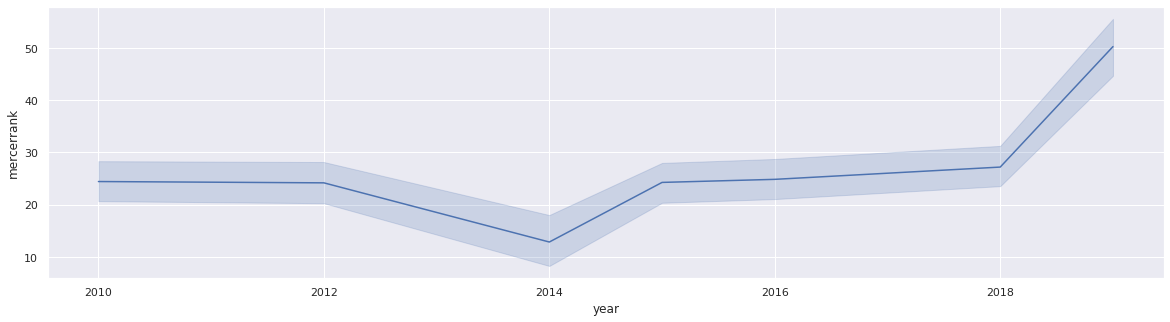

In [3]:
#visualizing all mercer rankings over time aggregated
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(x="year", y="mercerrank",
           #hue="Country" ,# style="event",
             data=dfMercer)


In [4]:
#adding additional features for each city
#Source: United Nations Human Settlements Programme (UN-Habitat), Global Urban Indicators Database 2012.
dfProsperity2012 = pd.read_csv('data/city-prosperity-index_country.csv')
dfProsperity2012.columns = ['country','city','cpi5','cpi4','productivity','qualityOfLife','infrastructure','environment','equity']

dfProsperity2012.head(300)
dfProsperity2012 = dfProsperity2012.set_index('city')
dfProsperity2012

,country,cpi5,cpi4,productivity,qualityOfLife,infrastructure,environment,equity
city,,,,,,,,
Yerevan,Armenia,0.779,0.769,0.635,0.850,0.870,0.745,0.817
Melbourne,Australia,0.903,0.925,0.867,0.875,0.996,0.967,0.820
Vienna,Austria,0.925,0.936,0.939,0.882,0.996,0.932,0.883
Dhaka,Bangladesh,0.633,0.593,0.545,0.539,0.673,0.627,0.817
Brussels,Belgium,0.883,0.910,0.862,0.864,0.997,0.922,0.783
...,...,...,...,...,...,...,...,...
Dar es Salaam,United Republic of Tanzania,0.571,0.530,0.427,0.371,0.607,0.822,0.767
New York,United States,0.825,0.934,0.940,0.866,0.994,0.941,0.502
Hà Noi,Viet Nam,0.756,0.776,0.712,0.761,0.912,0.733,0.683


In [5]:
#how do the ratings correlate? 
#since we have just 2012 from prosperity data we can only correlate these ratings to paint a scatter chart. 
dfMercer2012 = dfMercer.loc[dfMercer['year']== 2012,:]
dfMercer2012 = dfMercer2012.set_index('city')
dfMercer2012
mergedDf = dfMercer2012.merge(dfProsperity2012, left_index=True, right_index=True)
mergedDf

,country_x,mercerindex,year,mercerrank,country_y,cpi5,cpi4,productivity,qualityOfLife,infrastructure,environment,equity
city,,,,,,,,,,,,
Vienna,Austria,108.6,2012,1,Austria,0.925,0.936,0.939,0.882,0.996,0.932,0.883
Auckland,New Zealand,107.4,2012,3,New Zealand,0.862,0.922,0.854,0.889,0.994,0.958,0.657
Copenhagen,Denmark,106.2,2012,9,Denmark,0.913,0.911,0.855,0.871,0.997,0.928,0.922
Amsterdam,Netherlands,105.7,2012,12,Netherlands,0.895,0.915,0.866,0.872,0.995,0.933,0.818
Toronto,Canada,105.3,2012,15,Canada,0.890,0.934,0.874,0.907,0.997,0.963,0.733
Melbourne,Australia,104.8,2012,17,Australia,0.903,0.925,0.867,0.875,0.996,0.967,0.820
Stockholm,Sweden,104.5,2012,19,Sweden,0.898,0.934,0.896,0.925,0.995,0.921,0.767
Oslo,Norway,103.9,2012,32,Norway,0.924,0.929,0.870,0.914,0.997,0.939,0.903
Brussels,Belgium,105.4,2012,22,Belgium,0.883,0.910,0.862,0.864,0.997,0.922,0.783


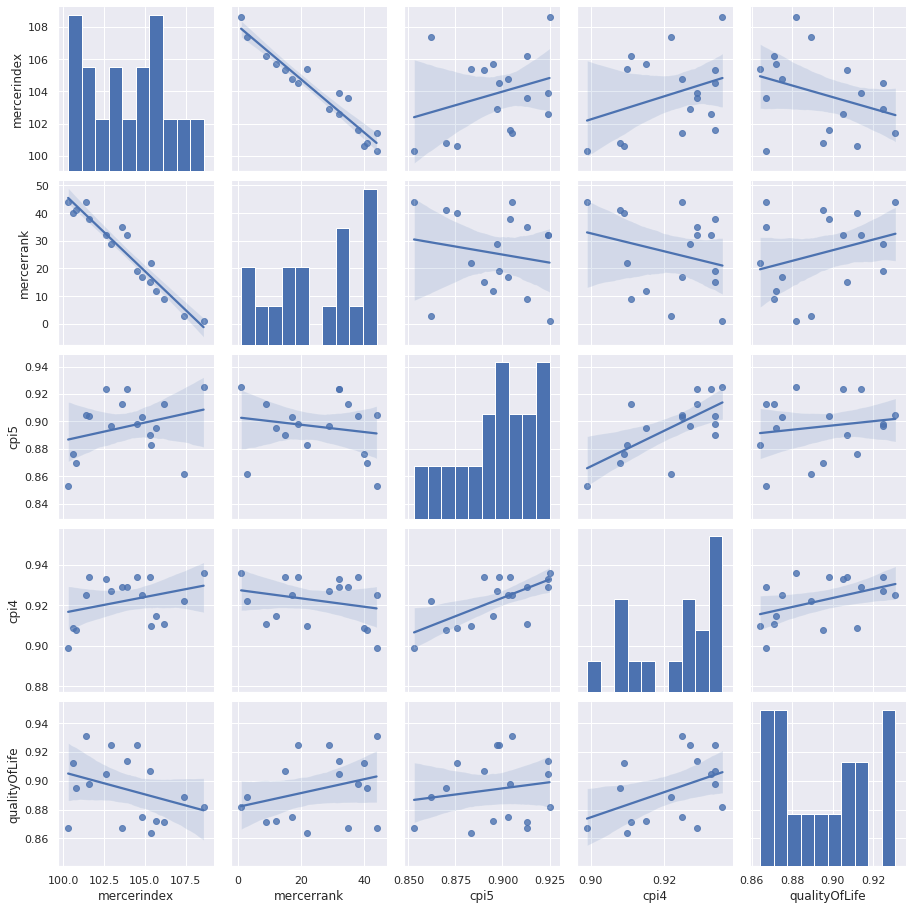

In [6]:
#how do the ratings correlate?
sns.pairplot(mergedDf.loc[:,['mercerindex','mercerrank','cpi5','cpi4','qualityOfLife']],kind="reg")